In [ ]:
!pip install filterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=05cf0938f9c5e3361985c8df452f16f71f54d35c120a12e940584479facd034c
  Stored in directory: /root/.cache/pip/wheels/fe/f6/cb/40331472edf4fd399b8cad02973c6acbdf26898342928327fe
Successfully built filterpy


In [ ]:
import numpy as np
from filterpy.kalman import KalmanFilter

import matplotlib.pyplot as plt

In [ ]:
def weight_kalman_filter(measurements, initial_state, initial_covariance, transition_matrix, measurement_matrix, process_noise_covariance, measurement_noise_covariance):
    # Initialize the Kalman filter
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = initial_state
    kf.P = initial_covariance
    kf.F = transition_matrix
    kf.H = measurement_matrix
    kf.R = measurement_noise_covariance
    kf.Q = process_noise_covariance

    # Store the estimated weights
    estimated_weights = []
    for measurement in measurements:
        # Predict the state and covariance
        kf.predict()
        
        # Update the state and covariance based on the measurement
        kf.update(measurement)
        
        # Store the estimated weight
        estimated_weights.append(kf.x[0])
        
    return np.array(estimated_weights)

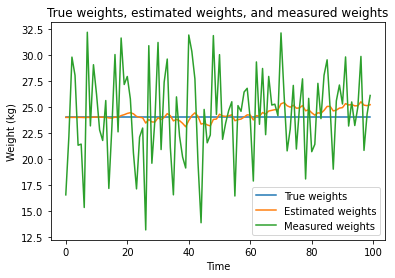

In [ ]:
# Example weights
initial_state = np.array([24.0, 0.0])
initial_covariance = np.array([[0.1, 0.0], [0.0, 0.1]])
transition_matrix = np.array([[1.0, 1.0], [0.0, 1.0]])
measurement_matrix = np.array([[1.0, 0.0]])
process_noise_covariance = np.array([[0.1, 0.0], [0.0, 0.1]])
measurement_noise_covariance = np.array([[10000]])

true_weights = np.array([24]*100)
measured_weights = true_weights + np.random.normal(0, 4, size=len(true_weights))
estimated_weights = weight_kalman_filter(measured_weights, initial_state, initial_covariance, transition_matrix, measurement_matrix, process_noise_covariance, measurement_noise_covariance)

# Plot the true weights, estimated weights and measured weights
plt.plot(true_weights, label='True weights')
plt.plot(estimated_weights, label='Estimated weights')
plt.plot(measured_weights, label='Measured weights')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Weight (kg)')
plt.title('True weights, estimated weights, and measured weights')
plt.show()
